<a href="https://colab.research.google.com/github/soheldatta17/Expensive-Football-Player-Analysis/blob/main/Expensive_Football_Player_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Expensive Football Player Analysis by Sohel Datta**

In [ ]:
import kagglehub
import os
import shutil

content_folder = 'content'
os.makedirs(content_folder, exist_ok=True)

jeongbinpark_staatfont_path = kagglehub.dataset_download('jeongbinpark/staatfont')
berkayalan_the_most_expensive_football_transfers_path = kagglehub.dataset_download('berkayalan/the-most-expensive-football-transfers')

staatfont_dest = os.path.join(content_folder, os.path.basename(jeongbinpark_staatfont_path))
football_transfers_dest = os.path.join(content_folder, os.path.basename(berkayalan_the_most_expensive_football_transfers_path))

shutil.move(jeongbinpark_staatfont_path, staatfont_dest)
shutil.move(berkayalan_the_most_expensive_football_transfers_path, football_transfers_dest)

print('Data source import complete. Files saved in the "content" folder.')

100%|██████████| 29.1k/29.1k [00:00<00:00, 30.5MB/s]

Extracting files...


100%|██████████| 2.05k/2.05k [00:00<00:00, 1.92MB/s]

Extracting files...
Data source import complete. Files saved in the "content" folder.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
font = fm.FontProperties(fname='/content/content/1/Staatliches-Regular.ttf')
data = pd.read_csv("/content/content/1/1/football_players.csv")

In [5]:
data.head(10)

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991
5,6,England,Jack Grealish,England,Aston Villa,England,Manchester City,Midfielder,117.0,£100,2021,1995
6,7,France,Paul Pogba,Italy,Juventus,England,Manchester United,Midfielder,105.0,£89,2016,1993
7,7,France,Ousmane Dembélé,Germany,Borussia Dortmund,Spain,Barcelona,Forward,105.0,£97,2017,1997
8,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
9,10,Portugal,Cristiano Ronaldo,Spain,Real Madrid,Italy,Juventus,Forward,100.0,£88,2018,1985



* Rank: Rank of transfer

* Origin : Origin Country of Player

* Player : Player Name

* From(Country) : From which country the player transferred?

* From(Club) : From which Club the player transferred?

* To(Country) : To which country the player transferred?

* To(Club) : To which Club the player transferred?

* Position : Position of The player

* Fee(€ mln) : How much fee were paid for the transfer as € mln.

* Fee(£ mln) : How much fee were paid for the transfer as £ mln.

* Year : In which year the transfer occured?

* Born : When was the player born?

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
1. The average of player trade price each position
</h1>
</div>

### Football generally has 4 different positions
* Forward

* Midfielder

* Defender

* Goalkeeper

<ipython-input-6-b2fe5b04a7a2>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(s = f"{position.index[i]} ({each_position_count[i*-1 +3]})", x=round(position['Fee_€ mln'][i]-1,2), y=i ,font = font, fontsize=30,va='center',ha='right')
<ipython-input-6-b2fe5b04a7a2>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(s = f"{round(position['Fee_€ mln'][i],2)} € mln", x=round(position['Fee_€ mln'][i]+1,2), y=i ,font = font, fontsize=30,va='center',ha='left')


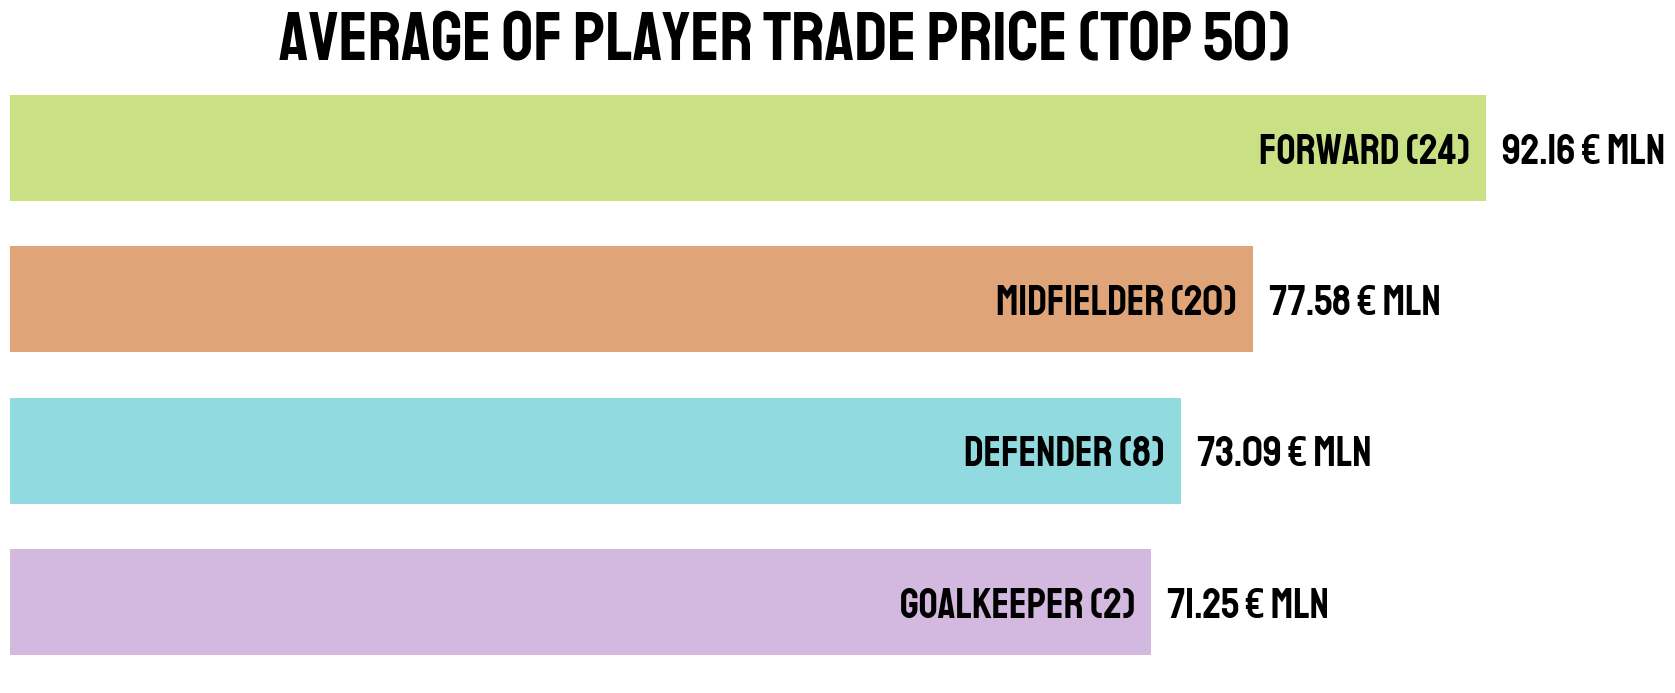

In [6]:
data.columns = ['Rank', 'Origin', 'Player', 'From_Country', 'From_Club',
       'To_Country', 'To_Club', 'Position', 'Fee_€ mln','Fee_£ mln','Year', 'Born']

data['Position'] = data['Position'].apply(lambda x : x if x!='Striker' else 'Forward')
position = pd.DataFrame(data.groupby('Position')['Fee_€ mln'].mean())
position = position.sort_values('Fee_€ mln', axis=0,ascending=True)
each_position_count = data['Position'].value_counts()

fig = plt.figure(figsize=(20,8))
plt.barh(width=position['Fee_€ mln'], y=position.index,height=0.7, color = ['#D3B9DF','#90DAE0','#E0A479','#CAE084'])
for i in range(len(position)):
    plt.text(s = f"{position.index[i]} ({each_position_count[i*-1 +3]})", x=round(position['Fee_€ mln'][i]-1,2), y=i ,font = font, fontsize=30,va='center',ha='right')
    plt.text(s = f"{round(position['Fee_€ mln'][i],2)} € mln", x=round(position['Fee_€ mln'][i]+1,2), y=i ,font = font, fontsize=30,va='center',ha='left')

plt.title("average of player trade price (Top 50)",font=font, fontsize=50)
plt.axis('off')
plt.show()

In [7]:
data.columns.tolist()

['Rank',
 'Origin',
 'Player',
 'From_Country',
 'From_Club',
 'To_Country',
 'To_Club',
 'Position',
 'Fee_€ mln',
 'Fee_£ mln',
 'Year',
 'Born']

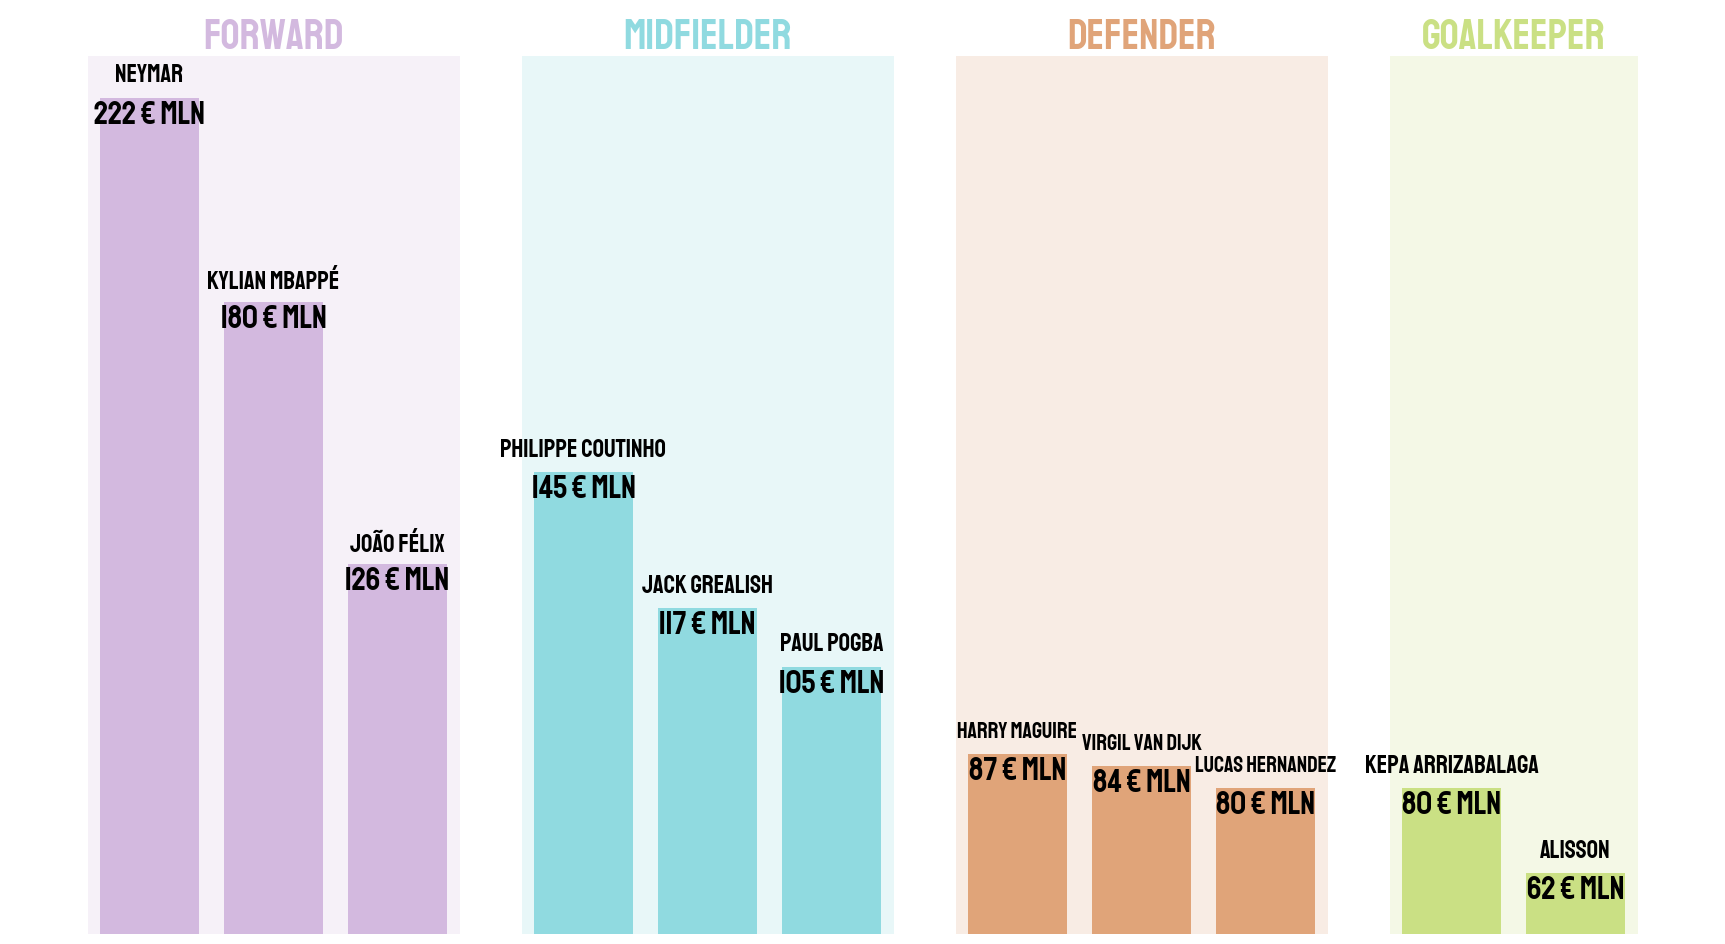

In [8]:
forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(22,12), facecolor="w")
plt.bar(x= [0,1,2], height=forward['Fee_€ mln'], color ='#D3B9DF')
plt.bar(x= [3.5,4.5,5.5], height=mid['Fee_€ mln'], color='#90DAE0')
plt.bar(x= [7,8,9], height=defend['Fee_€ mln'], color ='#E0A479')
plt.bar(x= [10.5,11.5], height=goalkeeper['Fee_€ mln'], color ='#CAE084')

ax.axvspan(xmin = -0.5,xmax= 2.5, ymax= 0.95, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin = 3,xmax= 6, ymax= 0.95, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin = 6.5,xmax= 9.5, ymax= 0.95, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin = 10,xmax= 12, ymax= 0.95, fc='#CAE084', alpha=0.2)

for i in range(len(forward)):
    plt.text(s = forward.loc[i,'Player'], x= i, y= forward.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(forward.loc[i,'Fee_€ mln'])} € mln", x= i, y= forward.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

    plt.text(s = mid.loc[i,'Player'], x= i+3.5, y= mid.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(mid.loc[i,'Fee_€ mln'])} € mln", x= i+3.5, y= mid.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

    plt.text(s = defend.loc[i,'Player'], x= i+7, y= defend.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 16)
    plt.text(s = f"{round(defend.loc[i,'Fee_€ mln'])} € mln", x= i+7, y= defend.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

    if i ==2:
        break
    plt.text(s = goalkeeper.loc[i,'Player'], x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(goalkeeper.loc[i,'Fee_€ mln'])} € mln", x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

plt.text(s = "forward", x= 1, y= 235, va='center', ha='center',font=font, fontsize= 30,color ='#D3B9DF')
plt.text(s = "Midfielder", x= 4.5, y= 235, va='center', ha='center',font=font, fontsize= 30, color='#90DAE0')
plt.text(s = "Defender", x= 8, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#E0A479')
plt.text(s = "Goalkeeper", x= 11, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#CAE084')

plt.ylim(50,240)
plt.axis('off')
plt.show()

In [9]:
!pip install Pillow
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00


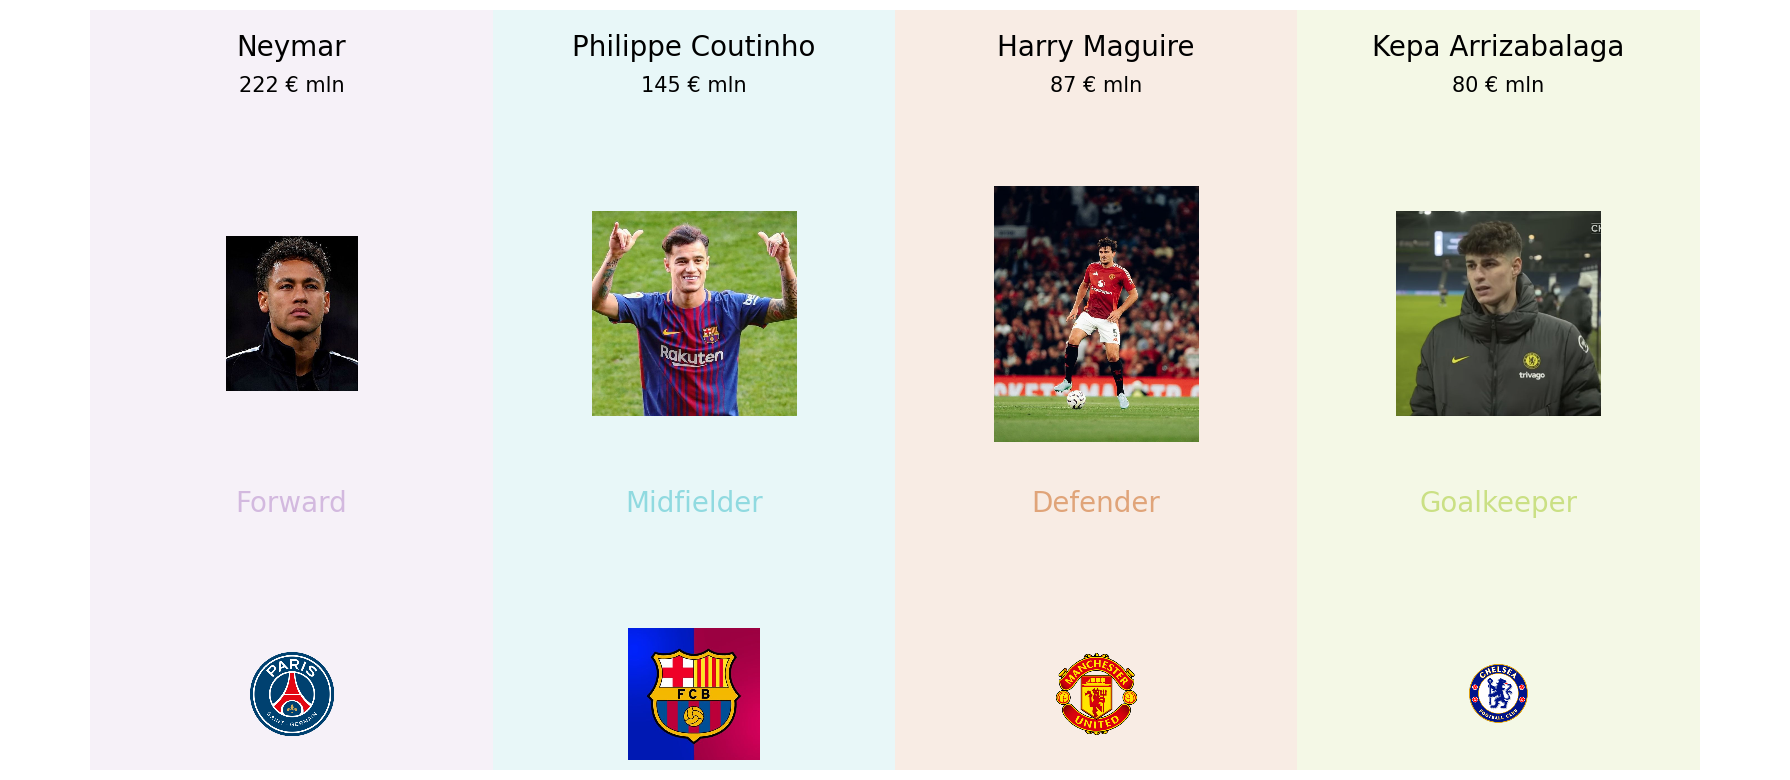

In [10]:
from PIL import Image
import requests
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cairosvg

def make_img(img, zoom, x, y):
    """
    Displays an image on the plot.

    Args:
        img (str): URL of the image.
        zoom (float): Zoom factor for the image.
        x (float): X coordinate for the image placement.
        y (float): Y coordinate for the image placement.
    """
    try:
        # If the image is an SVG, convert it to PNG using cairosvg
        if img.lower().endswith('.svg'):
            png_data = cairosvg.svg2png(url=img)
            img = Image.open(io.BytesIO(png_data))
        else:
            # Use requests to get the image data from the URL for other formats
            response = requests.get(img)
            response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
            img = Image.open(io.BytesIO(response.content))

        # Convert the Pillow image to a NumPy array that matplotlib can understand
        img = mpimg.pil_to_array(img)

        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)

    except Exception as e:
        print(f"Error processing image {img}: {e}")

forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(18, 8), facecolor="w")  # Reduced figure size

# Adjust background spans
ax.axvspan(xmin=0, xmax=4, ymax=1, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin=4, xmax=8, ymax=1, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin=8, xmax=12, ymax=1, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin=12, xmax=16, ymax=1, fc='#CAE084', alpha=0.2)

# Adjust zoom and positions
make_img('https://i.pinimg.com/736x/65/c6/e3/65c6e35f43f04c834fb5f135e2ef96cc.jpg', 0.2, 2, 0.6)
make_img('https://upload.wikimedia.org/wikipedia/en/a/a7/Paris_Saint-Germain_F.C..svg', 0.2, 2, 0.1)
make_img('https://i.pinimg.com/736x/4c/90/b6/4c90b63476ae9bab180e6826dcac722c.jpg', 0.2, 6, 0.6)
make_img('https://i.pinimg.com/474x/0d/c4/c8/0dc4c86d8590170d02719a27c615da9f.jpg', 0.2, 6, 0.1)
make_img('https://i.pinimg.com/736x/a4/be/68/a4be686f2547615f74c67257773cd22b.jpg', 0.2, 10, 0.6)
make_img('https://upload.wikimedia.org/wikipedia/en/7/7a/Manchester_United_FC_crest.svg', 0.2, 10, 0.1)
make_img('https://i.pinimg.com/736x/a0/58/ec/a058ece5cf6a440ab0a01c0030ed211f.jpg', 0.2, 14, 0.6)
make_img('https://upload.wikimedia.org/wikipedia/en/c/cc/Chelsea_FC.svg', 0.2, 14, 0.1)

# Text adjustments with smaller font sizes
plt.text(s=forward.loc[0, 'Player'], x=2, y=0.95, va='center', ha='center', fontsize=20)
plt.text(s=mid.loc[0, 'Player'], x=6, y=0.95, va='center', ha='center', fontsize=20)
plt.text(s=defend.loc[0, 'Player'], x=10, y=0.95, va='center', ha='center', fontsize=20)
plt.text(s=goalkeeper.loc[0, 'Player'], x=14, y=0.95, va='center', ha='center', fontsize=20)

plt.text(s=f"{round(forward.loc[0, 'Fee_€ mln'])} € mln", x=2, y=0.9, va='center', ha='center', fontsize=15)
plt.text(s=f"{round(mid.loc[0, 'Fee_€ mln'])} € mln", x=6, y=0.9, va='center', ha='center', fontsize=15)
plt.text(s=f"{round(defend.loc[0, 'Fee_€ mln'])} € mln", x=10, y=0.9, va='center', ha='center', fontsize=15)
plt.text(s=f"{round(goalkeeper.loc[0, 'Fee_€ mln'])} € mln", x=14, y=0.9, va='center', ha='center', fontsize=15)

plt.text(s="Forward", x=2, y=0.35, va='center', ha='center', fontsize=20, color='#D3B9DF')
plt.text(s="Midfielder", x=6, y=0.35, va='center', ha='center', fontsize=20, color='#90DAE0')
plt.text(s="Defender", x=10, y=0.35, va='center', ha='center', fontsize=20, color='#E0A479')
plt.text(s="Goalkeeper", x=14, y=0.35, va='center', ha='center', fontsize=20, color='#CAE084')

plt.axis('off')
plt.tight_layout()
plt.show()


### This is each position's most expensive players, you can feel forward and midfileder position are more expensive than defender and goalkeeper

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
2. Which club  trades most of the players?
</h1>
</div>

In [11]:
data.columns.tolist()

['Rank',
 'Origin',
 'Player',
 'From_Country',
 'From_Club',
 'To_Country',
 'To_Club',
 'Position',
 'Fee_€ mln',
 'Fee_£ mln',
 'Year',
 'Born']

In [12]:
from google.colab import files
data.to_csv('/content/football_transfer.csv')

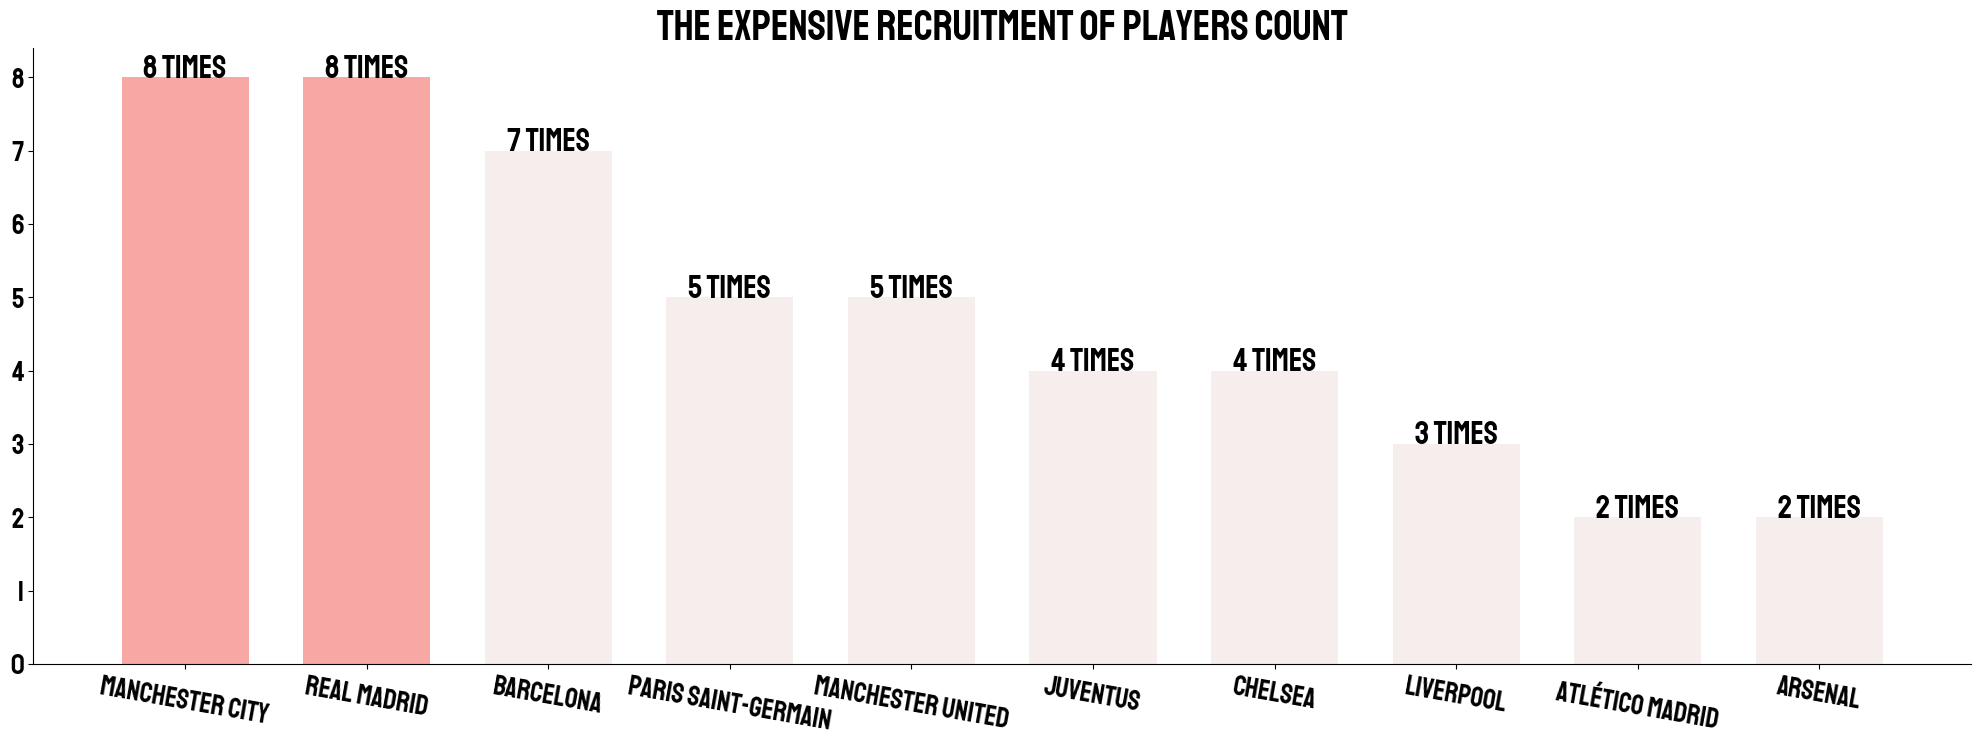

In [13]:
many_club_all = data['To_Club'].value_counts()
many_club = pd.DataFrame(many_club_all[:10]).reset_index()
many_club.columns = ['team', 'count']

color = ['#F7A8A5', '#F7A8A5']
color += ['#F5EEED']*8
plt.figure(figsize=(25,8))
plt.bar(x=many_club['team'], height = many_club['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club)):
    plt.text(s= f"{many_club.loc[i,'count']} times", x= i, y=many_club.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive Recruitment of players count", font=font, fontsize=30)
plt.show()

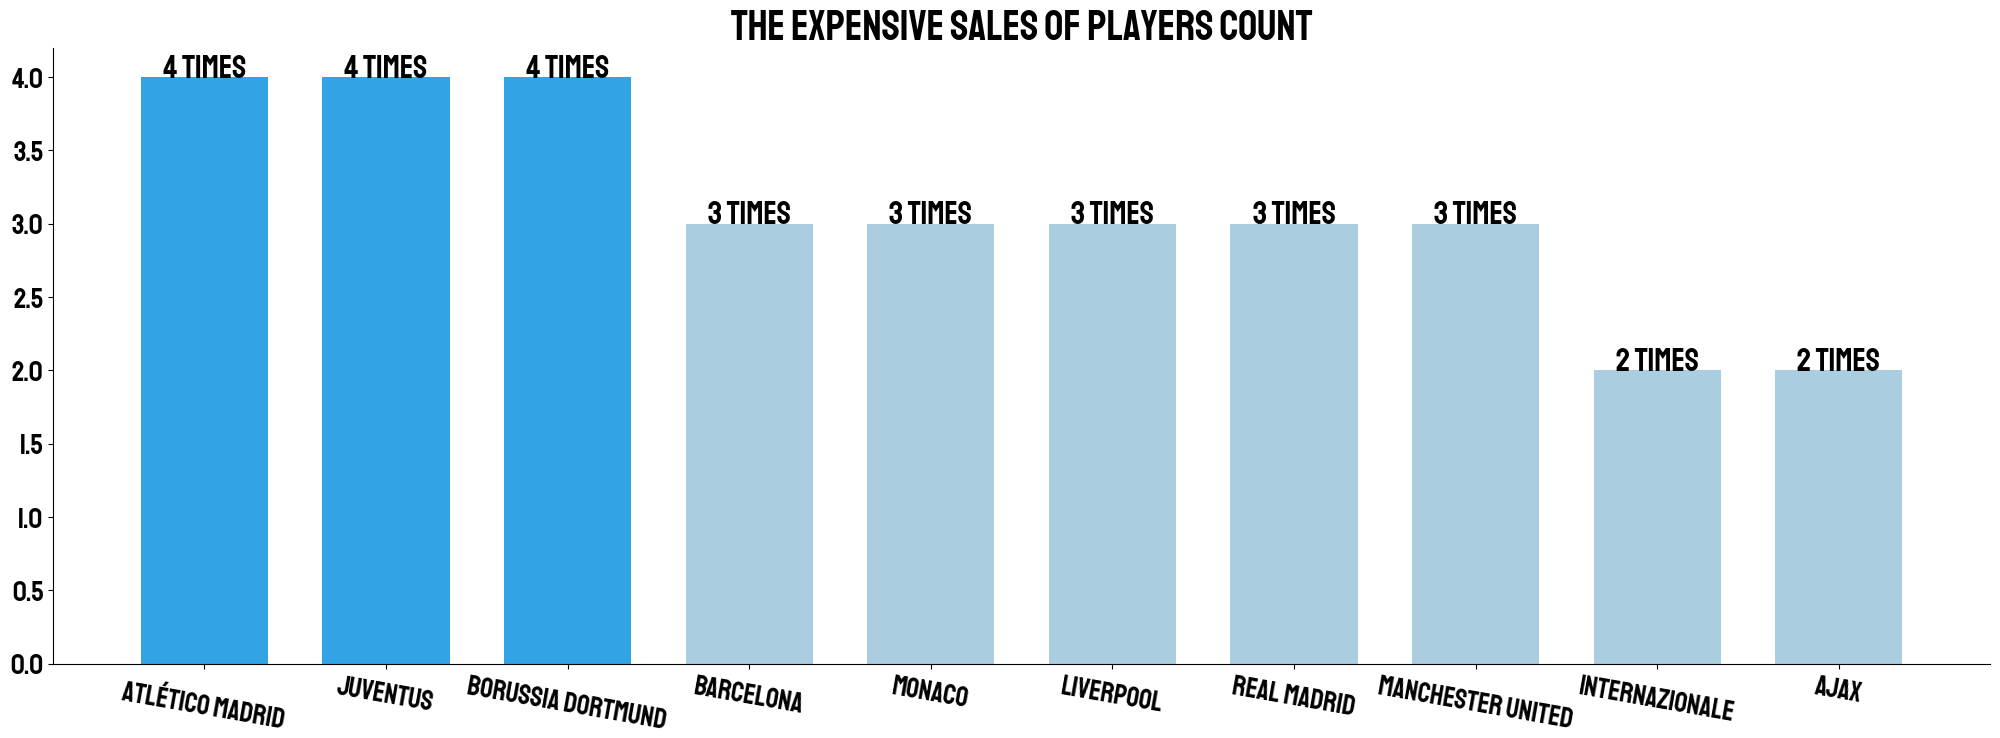

In [14]:
many_club_sale_all = data['From_Club'].value_counts()
many_club_sale = pd.DataFrame(many_club_sale_all[:10]).reset_index()
many_club_sale.columns = ['team', 'count']

color = ['#32A4E6']*3
color += ['#ABCDE0']*7
plt.figure(figsize=(25,8))
plt.bar(x=many_club_sale['team'], height = many_club_sale['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club_sale)):
    plt.text(s= f"{many_club_sale.loc[i,'count']} times", x= i, y=many_club_sale.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive sales of players count", font=font, fontsize=30)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
3. Where is that expensive player's country?
</h1>
</div>

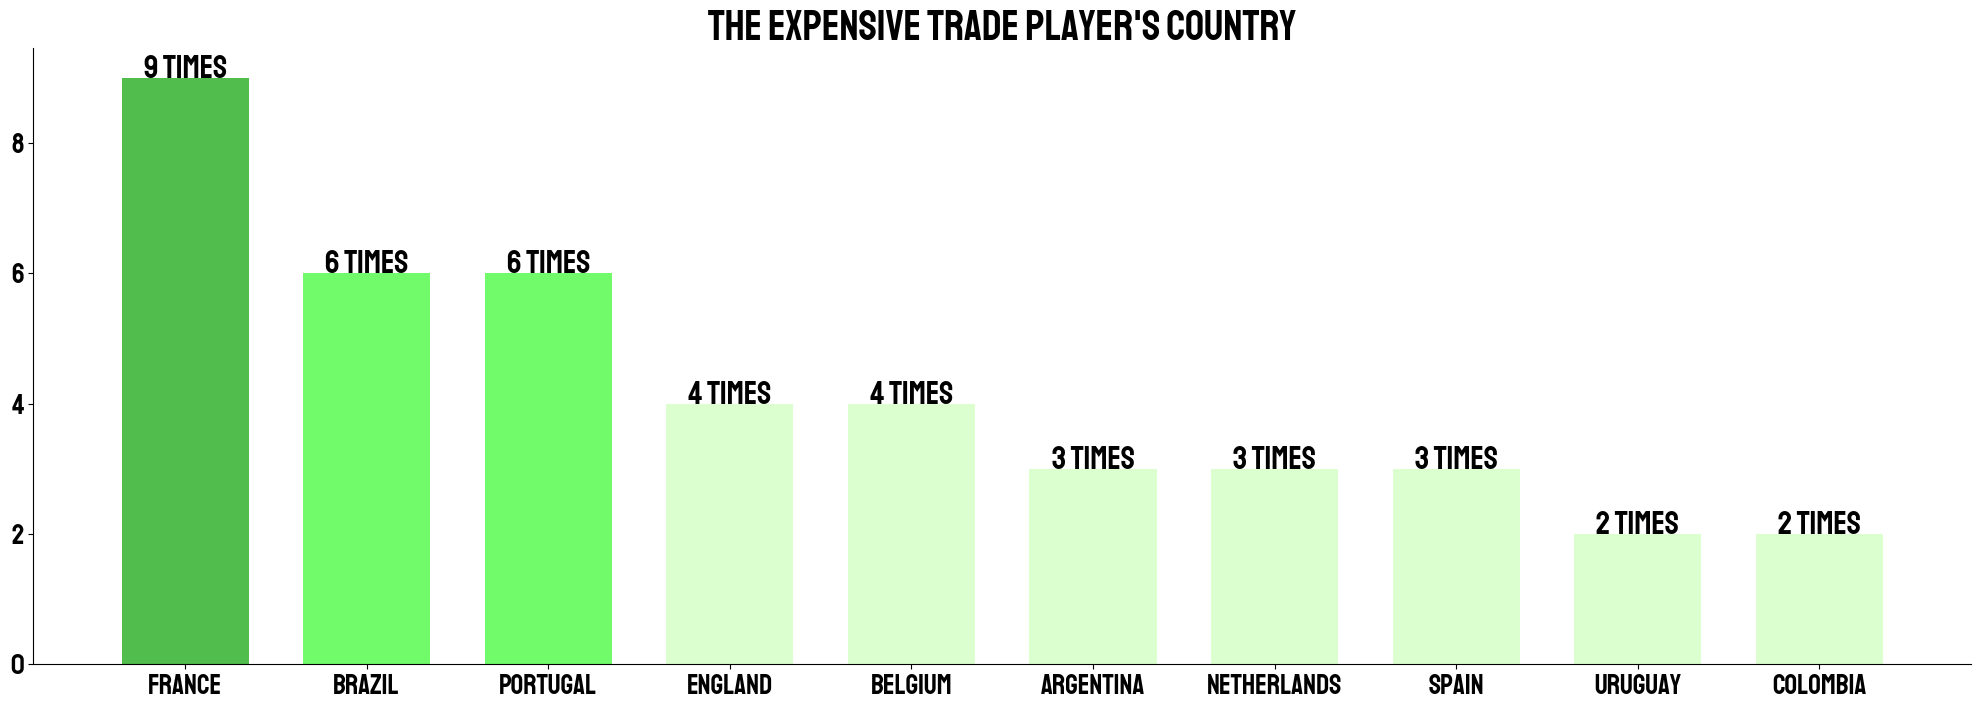

In [15]:
country = data['Origin'].value_counts()
country = pd.DataFrame(country[country > 1]).reset_index()
country.columns= ['country','count']
color = ['#26AD1F', '#4EFA46','#4EFA46']
color += ['#D4FFC5']*7
plt.figure(figsize=(25,8))
plt.bar(x=country['country'], height = country['count'],width=0.7,color =color,alpha=0.8)
plt.xticks(font=font,fontsize=20)
plt.yticks(font=font,fontsize=20)

for i in range(len(country)):
    plt.text(s= f"{country.loc[i,'count']} times", x= i, y=country.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive trade player's country", font=font, fontsize=30)
plt.show()

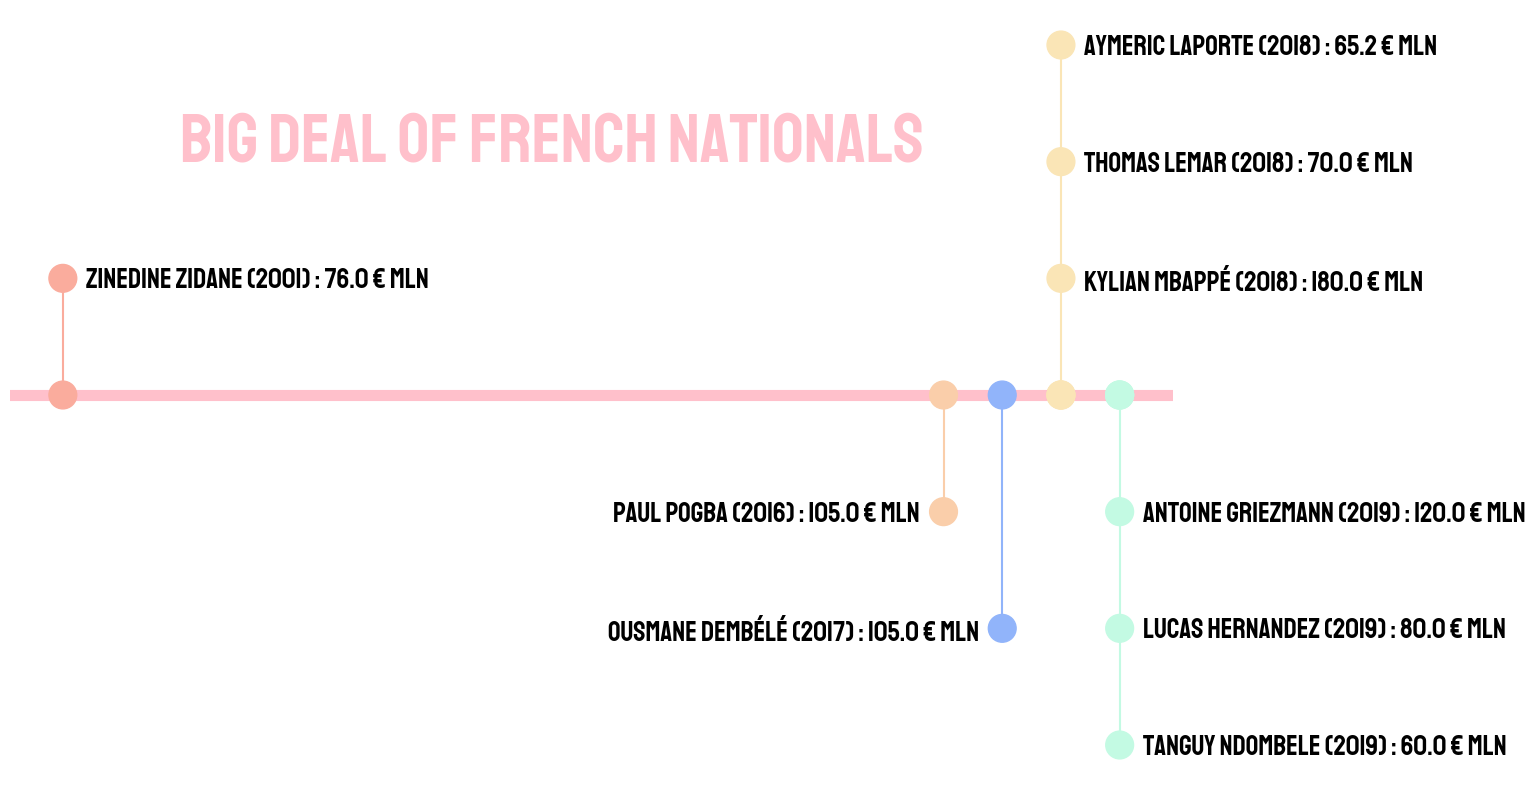

In [16]:
france = data[data['Origin'] =='France'].reset_index(drop=True)
fig = plt.figure(figsize=(15,10))
color = ['#FAE5B6','#C3FAE3','#FACEAA','#91B4FA','#C3FAE3','#FAAC9D','#FAE5B6','#FAE5B6','#C3FAE3']
plt.axhline(0,color='pink',lw=8,zorder=1)
plt.scatter(x=france['Year'], y=list([0]* 9),s=400,zorder=2,color = color)
plt.plot([2001,2001],[0,1],color = '#FAAC9D')
plt.plot([2016,2016],[0,-1],color = '#FACEAA')
plt.plot([2017,2017],[0,-2],color = '#91B4FA')
plt.plot([2018,2018],[0,3],color = '#FAE5B6')
plt.plot([2019,2019],[0,-3],color = '#C3FAE3')
color = ['#FAAC9D', '#FACEAA','#91B4FA','#FAE5B6','#FAE5B6','#FAE5B6','#C3FAE3','#C3FAE3','#C3FAE3']
plt.scatter([2001,2016,2017,2018,2018,2018,2019,2019,2019],[1,-1,-2,1,2,3,-1,-2,-3],s=400,color = color)
i = [5,2,3,0,6,7,1,4,8]
y = [1,-1,-2,1,2,3,-1,-2,-3]
position = ['left','right','right','left','left','left','left','left','left']
for j in range(9):
    if position[j] > 'left':
        x = france.loc[i[j],'Year'] -0.4
    else:
        x = france.loc[i[j],'Year'] +0.4
    plt.text(s=f"{france.loc[i[j],'Player']} ({france.loc[i[j],'Year']}) : {france.loc[i[j],'Fee_€ mln']} € mln" , x=x, y=y[j],font=font, fontsize=20,va='center',ha=position[j])
plt.text(s="Big Deal of French Nationals", x=2003, y=2, font=font, fontsize=50,color='pink')

plt.axis('off')
fig.show()

In [17]:
data[data['Position'] == 'Forward'].head(10)

,Rank,Origin,Player,From_Country,From_Club,To_Country,To_Club,Position,Fee_€ mln,Fee_£ mln,Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991
7,7,France,Ousmane Dembélé,Germany,Borussia Dortmund,Spain,Barcelona,Forward,105.0,£97,2017,1997
8,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
9,10,Portugal,Cristiano Ronaldo,Spain,Real Madrid,Italy,Juventus,Forward,100.0,£88,2018,1985
10,11,Belgium,Eden Hazard,England,Chelsea,Spain,Real Madrid,Forward,100.0,£89,2019,1991
11,12,Portugal,Cristiano Ronaldo,England,Manchester United,Spain,Real Madrid,Forward,94.0,£80,2009,1985
12,13,Argentina,Gonzalo Higuaín,Italy,Napoli,Italy,Juventus,Forward,90.0,£75.3,2016,1987


In [18]:
def highest_transfer_by_year(df):

    highest_transfers = {}
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        if not year_data.empty:
            highest_transfer = year_data['Fee_€ mln'].max()
            highest_transfers[year] = highest_transfer
    return highest_transfers

In [19]:
transfers_by_year = highest_transfer_by_year(data)
transfers_by_year

{2017: 222.0,
 2018: 180.0,
 2019: 126.0,
 2021: 117.0,
 2016: 105.0,
 2013: 100.0,
 2009: 94.0,
 2014: 82.3,
 2020: 77.0,
 2001: 76.0,
 2015: 75.0,
 2000: 62.0}

In [20]:
def show_bar_all(df):
  years = list(transfers_by_year.keys())
  transfer_fees = list(transfers_by_year.values())

  # Create the bar chart
  plt.figure(figsize=(25, 6))
  plt.bar(years, transfer_fees, color='skyblue', edgecolor='black')

  # Customize the chart
  plt.title('Highest Transfer Fees by Year')
  plt.xlabel('Year')
  plt.ylabel('Transfer Fee (€ mln)')
  plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid only for the y-axis

  plt.xticks(range(min(years), max(years) + 1, 1))

  # Show the chart
  plt.show()


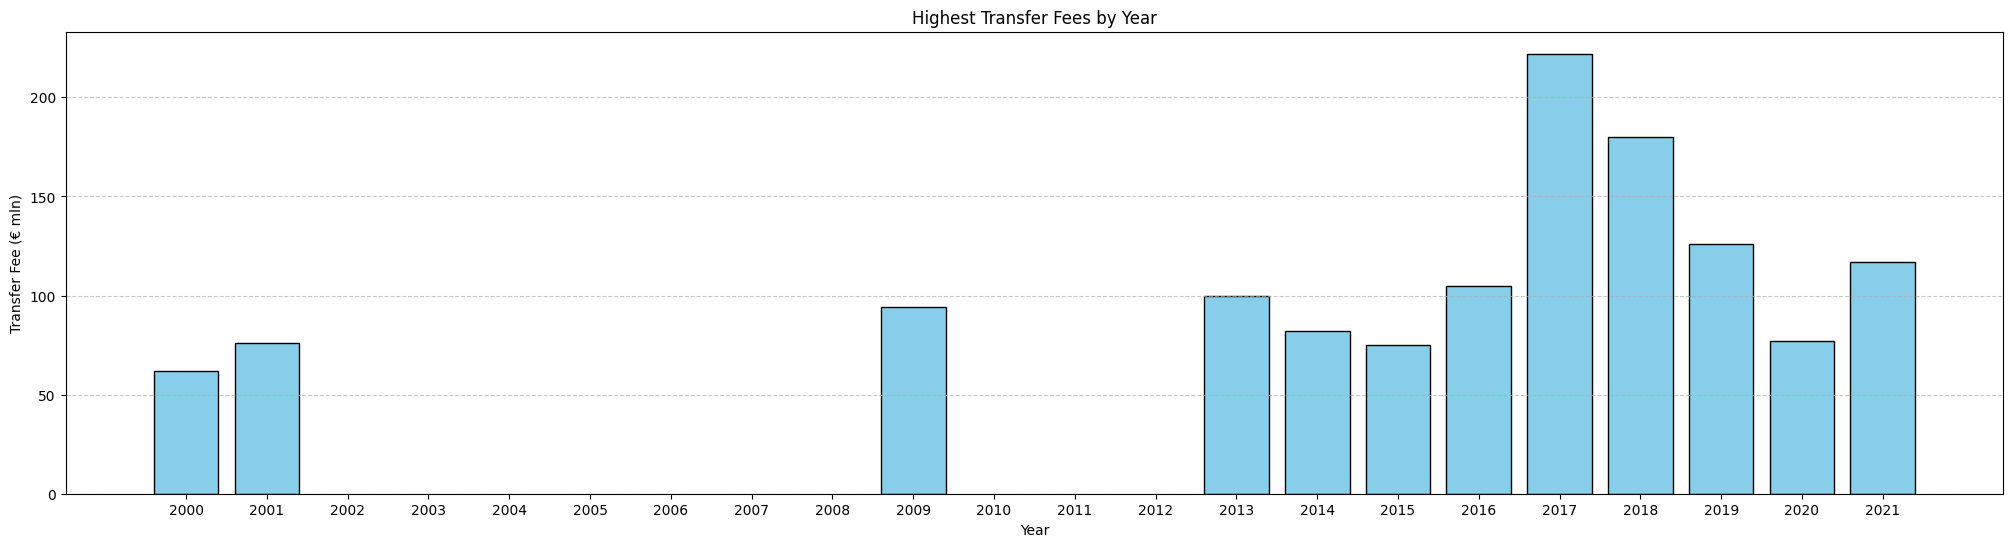

In [21]:
show_bar_all(transfers_by_year)

In [22]:
all_positions = data['Position'].unique()
all_positions

array(['Forward', 'Midfielder', 'Defender', 'Goalkeeper'], dtype=object)

In [23]:
def show_bar_pos(transfers_by_position_year, position):
  years = list(transfers_by_position_year.keys())
  transfer_fees = list(transfers_by_position_year.values())

  # Create the bar chart
  plt.figure(figsize=(25, 6))
  plt.bar(years, transfer_fees, color='skyblue', edgecolor='black')

  # Customize the chart
  plt.title(f'Highest Transfer of Fees {position} by Year')
  plt.xlabel('Year')
  plt.ylabel('Transfer Fee (€ mln)')
  plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid only for the y-axis

  plt.xticks(range(2000, 2022, 1))

  # Show the chart
  plt.show()


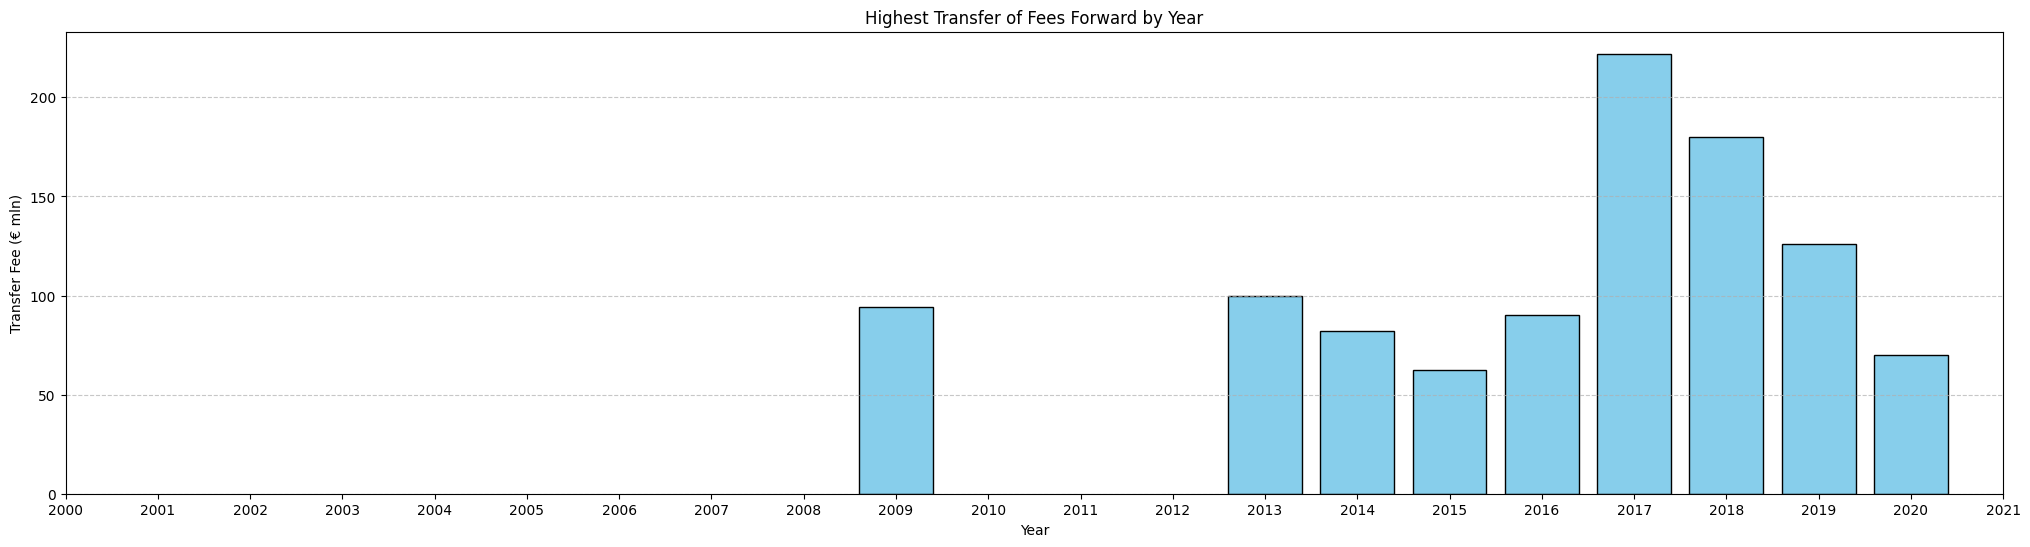

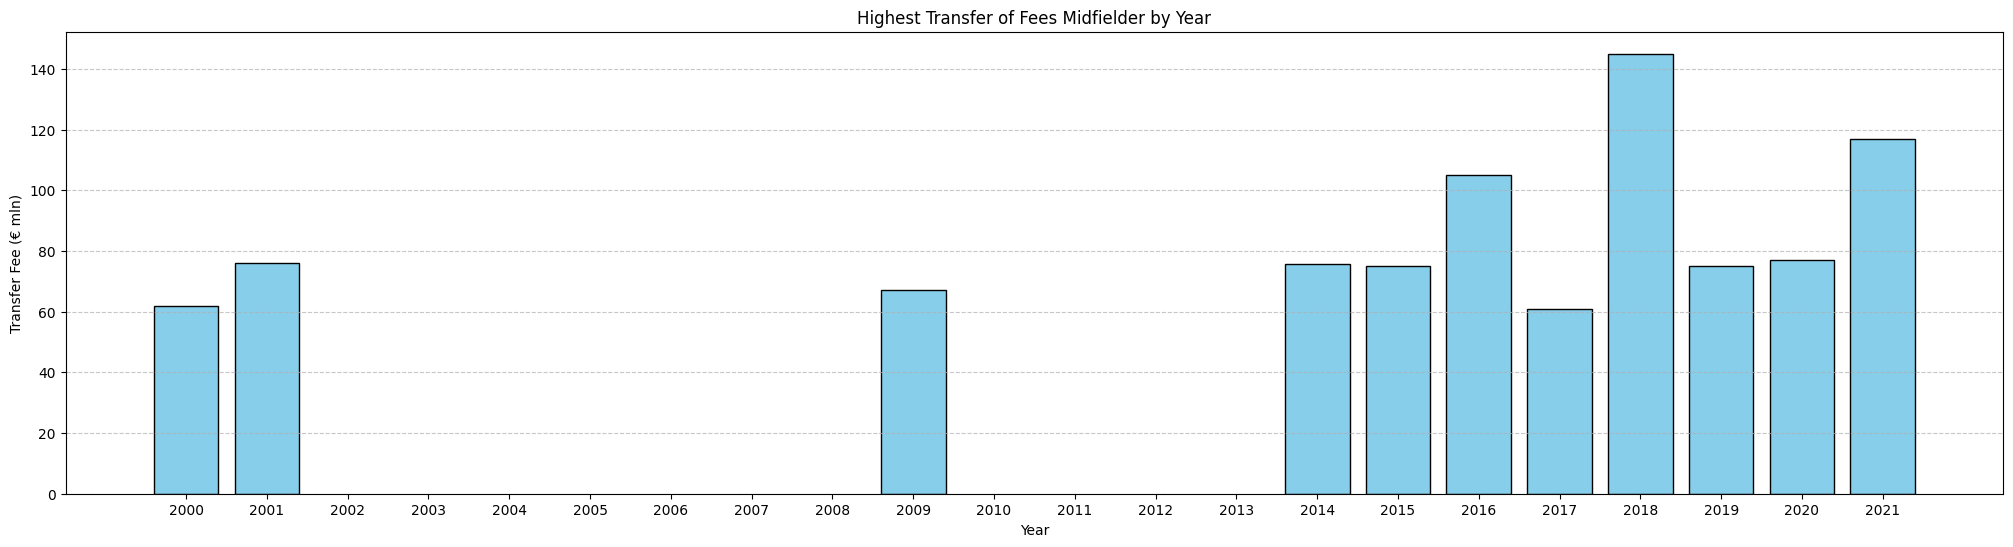

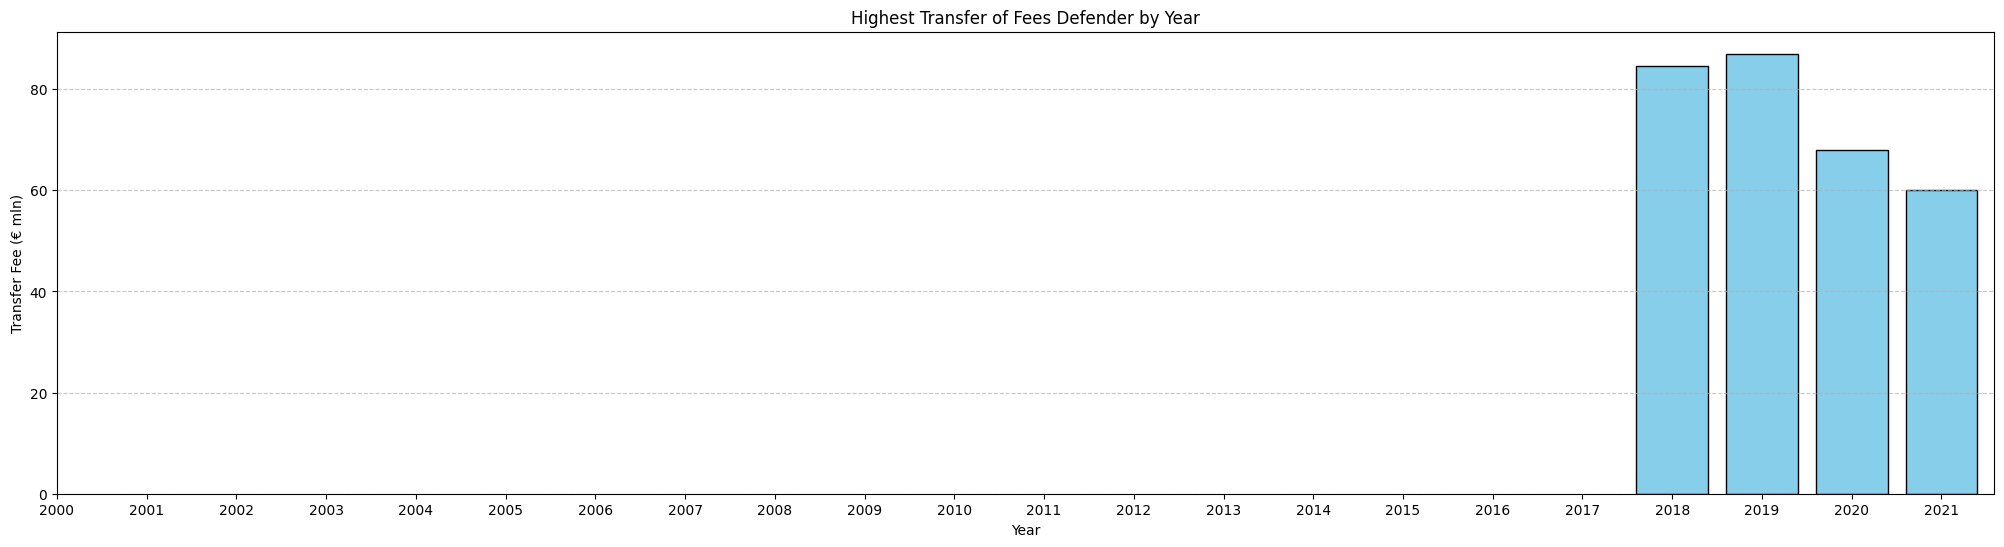

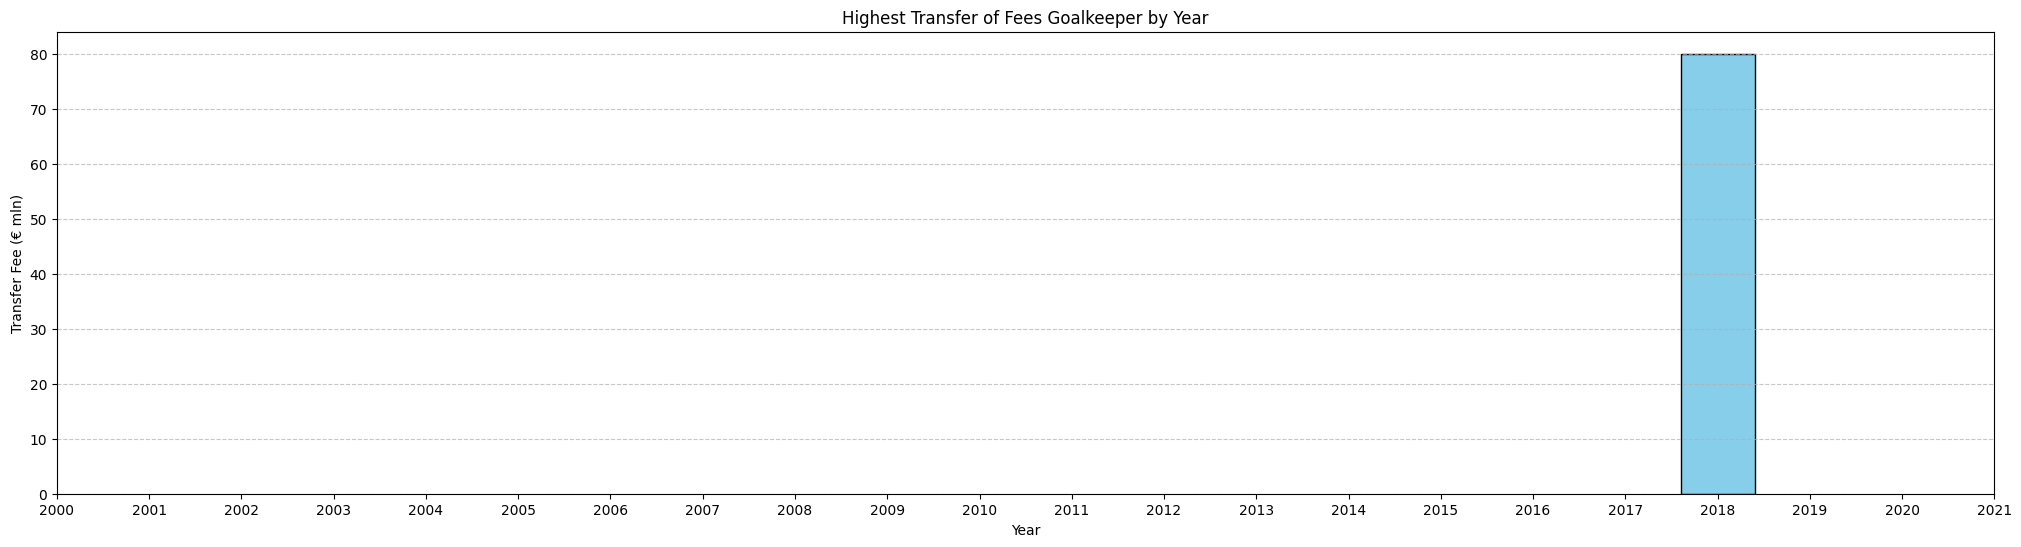

In [24]:
for position in all_positions:
    position_data = data[data['Position'] == position]
    transfers_by_position_year = highest_transfer_by_year(position_data)
    show_bar_pos(transfers_by_position_year, position)


**Train a Model**

In [25]:
transfer_data = pd.read_csv('/content/football_transfer.csv')

**Drop features that are not required to build our model**

In [26]:
transfer_data = transfer_data.drop(['Unnamed: 0','Fee_£ mln','Player','Origin','Born','Rank'],axis=1)

In [27]:
transfer_data.columns.tolist()

['From_Country',
 'From_Club',
 'To_Country',
 'To_Club',
 'Position',
 'Fee_€ mln',
 'Year']

In [ ]:
transfer_data.head(10)

,From_Country,From_Club,To_Country,To_Club,Position,Fee_€ mln,Year
0,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,2017
1,France,Monaco,France,Paris Saint-Germain,Forward,180.0,2018
2,England,Liverpool,Spain,Barcelona,Midfielder,145.0,2018
3,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,2019
4,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,2019
5,England,Aston Villa,England,Manchester City,Midfielder,117.0,2021
6,Italy,Juventus,England,Manchester United,Midfielder,105.0,2016
7,Germany,Borussia Dortmund,Spain,Barcelona,Forward,105.0,2017
8,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,2013
9,Spain,Real Madrid,Italy,Juventus,Forward,100.0,2018


In [28]:
transfer_data.shape

(54, 7)

In [29]:
transfer_data.isnull().sum()

,0
From_Country,0
From_Club,0
To_Country,0
To_Club,0
Position,0
Fee_€ mln,0
Year,0


In [30]:
transfer_data = transfer_data.rename(columns={'Fee_€ mln': 'Transfer_Fee'})

In [32]:
transfer_data.head(20)

,From_Country,From_Club,To_Country,To_Club,Position,Transfer_Fee,Year
0,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,2017
1,France,Monaco,France,Paris Saint-Germain,Forward,180.0,2018
2,England,Liverpool,Spain,Barcelona,Midfielder,145.0,2018
3,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,2019
4,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,2019
5,England,Aston Villa,England,Manchester City,Midfielder,117.0,2021
6,Italy,Juventus,England,Manchester United,Midfielder,105.0,2016
7,Germany,Borussia Dortmund,Spain,Barcelona,Forward,105.0,2017
8,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,2013
9,Spain,Real Madrid,Italy,Juventus,Forward,100.0,2018


In [31]:
# prompt: now label encode From_Country To_Country From_Club To_Club Positiona nd store it in transfer_data_encoded and list prev texts ad current numbers just as informarion and

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Define columns to encode
categorical_cols = ['From_Country', 'To_Country', 'From_Club', 'To_Club', 'Position']

# Create a copy of the DataFrame to store encoded values
transfer_data_encoded = transfer_data.copy()

# Encode each categorical column
for col in categorical_cols:
  transfer_data_encoded[col] = le.fit_transform(transfer_data_encoded[col])


In [33]:
transfer_data_encoded = transfer_data_encoded.drop(['From_Country', 'To_Country'],axis='columns')

In [34]:
transfer_data_encoded['Transfer_Fee'] = transfer_data_encoded['Transfer_Fee'].astype(int)

In [35]:
transfer_data_encoded.head(20)

,From_Club,To_Club,Position,Transfer_Fee,Year
0,4,12,1,222,2017
1,19,12,1,180,2018
2,15,2,3,145,2018
3,6,1,1,126,2019
4,3,2,1,120,2019
5,1,8,3,117,2021
6,12,9,3,105,2016
7,7,2,1,105,2017
8,25,13,1,100,2013
9,22,6,1,100,2018


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

club_mapping = {i: f"club_{i}" for i in range(27)}
to_club_mapping = {i: f"to_club_{i}" for i in range(16)}

transfer_data_encoded['From_Club_Name'] = transfer_data_encoded['From_Club'].map(club_mapping)
transfer_data_encoded['To_Club_Name'] = transfer_data_encoded['To_Club'].map(to_club_mapping)

X = transfer_data_encoded[['From_Club', 'To_Club', 'Position', 'Year']]
y = transfer_data_encoded['Transfer_Fee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model_filename = "transfer_fee_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")


Model saved to transfer_fee_model.pkl


In [40]:
def predict_transfer_fee(from_club, to_club, position, year, model_path):
    loaded_model = joblib.load(model_path)
    input_data = pd.DataFrame({
        'From_Club': [from_club],
        'To_Club': [to_club],
        'Position': [position],
        'Year': [year]
    })
    predicted_fee = loaded_model.predict(input_data)[0]
    return predicted_fee

In [41]:
from_club_num = 4
to_club_num = 12
position = 1
year = 2017

predicted_fee = predict_transfer_fee(from_club_num, to_club_num, position, year, "/content/transfer_fee_model.pkl")
print(f"Predicted transfer fee for player from {transfer_data_encoded.loc[transfer_data_encoded['From_Club'] == from_club_num, 'From_Club_Name'].iloc[0]} to {transfer_data_encoded.loc[transfer_data_encoded['To_Club'] == to_club_num, 'To_Club_Name'].iloc[0]} in {year}: {predicted_fee}")


Predicted transfer fee for player from club_4 to to_club_12 in 2017: 94.33664553910694
